# Import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Assess

In [3]:
# check object shape
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# check object type
for i in (x_train, y_train, x_test, y_test):
    print(i.dtype)

uint8
uint8
uint8
uint8


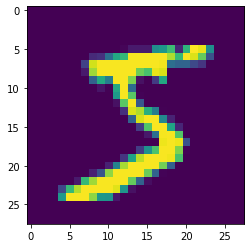

In [5]:
# plot first image in dataset
plt.imshow(x_train[0])

# Prepare

In [6]:
# convert uint8 to float32
(x_train, y_train, x_test, y_test) = [np.float32(x) for x in (x_train, y_train, x_test, y_test)]

In [7]:
# check object type after conversion
for i in (x_train, y_train, x_test, y_test): print(i.dtype)

float32
float32
float32
float32


In [8]:
# reshape images for CNN model
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
# check object shape after reshaping
for i in (x_train, x_test):
    print(i.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# normalize images and center around zero
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Task 1
## Implement simple CNN with fixed parameters
- A Convolutional layer will have 32 neurons (feature maps) and a 5x5 feature detector.

### Reasoning
**Hypothesis:** I expect this model to perform better than the model I used in the pre-work assignment, which was a fully connected neural network with one hidden layer made up of 8 units. The reason why I expect this is that - although simple - the model I am about to test is better suited for image processing problems, as it has been confirmed by the scientific community. The previous model yielded 84% accuracy on test set after 5 epochs with 128 batch size.

### Build

In [11]:
# build model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=5, activation='sigmoid'),
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dense(10, activation='softmax'),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile

In [12]:
# compile model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### Train

In [13]:
# # train model
# model.fit(
#   x_train,
#   tf.keras.utils.to_categorical(y_train),
#   epochs=5,
#   batch_size=128,
# )

### Evaluate

In [26]:
# # evaluate model
# model.evaluate(
#   x_test,
#   tf.keras.utils.to_categorical(y_test)
# )

In [28]:
print("Training set accuracy: 0.8904")
print("Test set accuracy: 0.9008")

Training set accuracy: 0.8904
Test set accuracy: 0.9008


**Observation:** The result confirms my hypothesis.

# Task 2
## Increase complexity by adding multiple convolution and dense layers
- Add one more convolutional layer with 32 neurons (feature maps) and a 5x5 feature detector. 
- Add a dense layer with 128 nodes.

### Reasoning
**Hypothesis:** Given that I am increasing the complexity of the model, I expect the performance to improve, at least over the training set. If the model doesn't overfit the dataset, then I expect the performance to improve on the test set as well.

### Build - 2nd iteration

In [15]:
# increase model complexity
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=5, activation='sigmoid'),
  tf.keras.layers.Conv2D(32, kernel_size=5, activation='sigmoid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

### Compile - 2nd iteration

In [16]:
# compile model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### Train - 2nd iteration

In [17]:
# # train model
# model.fit(
#   x_train,
#   tf.keras.utils.to_categorical(y_train),
#   epochs=5,
#   batch_size=128,
# )

### Evaluate - 2nd iteration

In [25]:
# # evaluate model
# model.evaluate(
#   x_test,
#   tf.keras.utils.to_categorical(y_test)
# )

In [29]:
print("Training set accuracy: 0.4533")
print("Test set accuracy: 0.6748")

Training set accuracy: 0.4533
Test set accuracy: 0.6748


**Observation:** The result does not confirm my hypothesis. Nonetheless, as opposed to the previous iteration - where returns were diminishing quickly - returns are increasing remarkably. For this reason, I suspect that the underperformance is due to the fact that I have not trained the model for enough epochs.

# Task 3
## How can you improve the models built in Tasks 1 & 2?
### Reasoning

**Observation**: In the first iteration, accuracy improves after every epoch but returns are diminishing. In the second iteration, accuracy at the end of the 5th epoch is lower than in the first iteration, but at every epoch performance improves more than in the previous epoch.

**Hypothesis**: My hypothesis is that the second model - which is more complex - can perform better the first one provided that it is trained for enough epochs.

In [19]:
# # train model
# model.fit(
#   x_train,
#   tf.keras.utils.to_categorical(y_train),
#   epochs=10,
#   batch_size=128,
# )

### Evaluate - 3nd iteration

In [27]:
# # evaluate model
# model.evaluate(
#   x_test,
#   tf.keras.utils.to_categorical(y_test)
# )

In [30]:
print("Training set accuracy: 0.9050")
print("Test set accuracy: 0.9132")

Training set accuracy: 0.9050
Test set accuracy: 0.9132


**Observation**: By adding epochs, test set accuracy improves slightly - from 90% to 91% - yet with diminishing returns. I suspect that this is due to the following consideration found on Quora (https://www.quora.com/What-should-I-do-when-adding-more-hidden-layers-to-a-deep-neural-network-causes-performance-to-decrease):

> [...] because you have so much output from layer n, layer n+1’s weighted input (just before the activation function) will be more extreme. Depending on your activation function this problem can go from bad to worse: sigmoid units are completely saturated and significantly slow down training because the sigmoid derivative gets smaller as its input gets farther from 0. [...]

# Task 4
## Change parameters/architecture to improve  quality metrics
**Hypothesis**: Assuming that diminishing returns were caused by the sigmoid derivatives getting smaller as their input got farther from zero, my hypothesis is that using ReLU activation instead of sigmoid will improve test set performance and training speed.

### Build

In [21]:
# increase model complexity
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=5, activation='relu'),
  tf.keras.layers.Conv2D(32, kernel_size=5, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

### Compile

In [22]:
# compile model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### Train

In [23]:
# train model
model.fit(
  x_train,
  tf.keras.utils.to_categorical(y_train),
  epochs=15,
  batch_size=128,
)

Epoch 1/15
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.6958 - acc: 0.7823
Epoch 2/15
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.2532 - acc: 0.9229
Epoch 3/15
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.1836 - acc: 0.9445
Epoch 4/15
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1425 - acc: 0.9569
Epoch 5/15
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.1146 - acc: 0.9655
Epoch 6/15
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0956 - acc: 0.9720
Epoch 7/15
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0821 - acc: 0.9757
Epoch 8/15
60000/60000 [==============================] - 148s 2ms/sample - loss: 0.0717 - acc: 0.9788
Epoch 9/15
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.0637 - acc: 0.9807
Epoch 10/15
60000/60000 [==============================] - 120s 2ms/sampl

### Evaluate

In [24]:
# evaluate model
model.evaluate(
  x_test,
  tf.keras.utils.to_categorical(y_test)
)

10000/10000 [==============================] - 10s 959us/sample - loss: 0.0529 - acc: 0.9830


[0.05291181025342084, 0.983]

In [31]:
print("Training set accuracy: 0.9889")
print("Test set accuracy: 0.9830")

Training set accuracy: 0.9889
Test set accuracy: 0.9830
